# DATA ANALYTICS
## descriptive Analysis
### TP1 – Python
#### Part 1

The objective of this lab is to conduct an exploratory/descriptive analysis on a file of purchases made by customers of a retailing group of decorative items and furniture.

First, let's import the libraries we will need


In [1]:
import pandas as pd

1. Load data from the file " AchatClients.csv " We specify dtype=object so that all the variables are read as strings. Then we will proceed to the conversion for the quantitative variables.

In [2]:
# 'AchatClients.csv' is in the same directory that your python process is based
df=pd.read_csv('AchatClients.csv', 
               dtype=object, delimiter="\t")

2.	Explore data structure 
The file is transformed into a dataframe

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df.columns

Index(['TIC_ENT_ID', 'NOMPRENOM', 'ADRESSE', 'COORDCLT', 'CMD_CLT_CODE',
       'MAG_CMD_CODE', 'DATE_MAJ_BATCH', 'CODE_RAY', 'CODE_PUB', 'TIC_ENT_CIV',
       'CP_ID', 'CLT_FACTU_QTE_LIVR', 'TIC_ENT_N_CART_PAIE', 'PRIX_VENTE_ETIQ',
       'CLT_FACTU_PUV', 'CLT_FACTU_MNT_FACTU_TTC', 'MNT_LIGNE_RED_F02223_TTC',
       'ID_CDE_MAGENTO', 'NEWSLETTRE', 'ARTREF_CODE', 'CODE_FAM',
       'CODE_SOU_FAM'],
      dtype='object')

In [5]:
print(df.shape[0])  # explorer le nombre de lignes du fichier
print(df.shape[1])  # explorer le nombre de colonnes du fichier

2447
22


3.	Modify columns names of the columns

display to check the modification

display each column type to make the necessary corrections/conversions

In [6]:
df.columns=['NumTicket','FullName','Address','Coordonnees','NumCommande','store',
            'PurchaseDate','Departement','ArticleEnPub',
           'SocialSit','CodePostal','Quantity','NumFidCard','LabelPrice','UnitPrice','AmountBeforeReduction',
           'AmountAfterReduction','CodeWeb','NewsletterSubscriber','Article','Family','SubFamily']

In [7]:
df.columns

Index(['NumTicket', 'FullName', 'Address', 'Coordonnees', 'NumCommande',
       'store', 'PurchaseDate', 'Departement', 'ArticleEnPub', 'SocialSit',
       'CodePostal', 'Quantity', 'NumFidCard', 'LabelPrice', 'UnitPrice',
       'AmountBeforeReduction', 'AmountAfterReduction', 'CodeWeb',
       'NewsletterSubscriber', 'Article', 'Family', 'SubFamily'],
      dtype='object')

In [8]:
print(df.dtypes)

NumTicket                object
FullName                 object
Address                  object
Coordonnees              object
NumCommande              object
store                    object
PurchaseDate             object
Departement              object
ArticleEnPub             object
SocialSit                object
CodePostal               object
Quantity                 object
NumFidCard               object
LabelPrice               object
UnitPrice                object
AmountBeforeReduction    object
AmountAfterReduction     object
CodeWeb                  object
NewsletterSubscriber     object
Article                  object
Family                   object
SubFamily                object
dtype: object


4.	Convert columns types

Some columns should be numerical, others are qualitative (categorical) variables. 


Pay attention to the date.


You can correct column by column, or several columns at once.

In [9]:
df[['Quantity']] = df[['Quantity']].apply(pd.to_numeric)

df = df.astype({'NumTicket':'str','FullName':'category','Address':'str','Coordonnees':'str',
                             'NumCommande':'str','store':'category','Departement':'category',
                              'ArticleEnPub':'category','SocialSit':'category','CodePostal':'category',
                             'NumFidCard':'str','CodeWeb':'str','NewsletterSubscriber':'category',
                              'Article':'category','Family':'category','SubFamily':'category'})

df['PurchaseDate'] = df['PurchaseDate'].apply(pd.to_datetime)



In [10]:
df.head

<bound method NDFrame.head of      NumTicket             FullName                      Address  \
0     17949252    AUCLAIR ALEXANDRA       180 RUE DES ECUREUILS    
1     12817341       AMABLE NICOLAS              76 AV CHEVREUL    
2     13575108         AMIS REBECCA          LE HAUT CARABOUET     
3     19135477   AMICHAUD CATHERINE              22 RUE CHARLET    
4      9170032              ARZOUNI         46 RUE D'ARGENTEUIL    
...        ...                  ...                          ...   
2442  23177060          ZENINA HENI              RUE RENE HOUAT    
2443  16795053       ZULAIKA RAFAEL         8 RUE GABRIEL FAURE    
2444  24026738            ZORN ZORN  18 RUE DU PONT DE L ABBAYE    
2445   3187683     ZILLIG ANNABELLE        12 RUE DE LA LAMPROI    
2446  20022450  ZIMMERMANN SANDRINE    74 CHEMIN DE FRANCHEMARE    

                                            Coordonnees NumCommande store  \
0     AUCLAIR ALEXANDRA MME 180 RUE DES ECUREUILS  P...     T274632   752   

5.	Display the information of the ticket 13775904

We make a kind of filter to select the line with the ticket number 13775904

In [11]:
df.loc[df['NumTicket'] == '13775904']

,NumTicket,FullName,Address,Coordonnees,NumCommande,store,PurchaseDate,Departement,ArticleEnPub,SocialSit,...,NumFidCard,LabelPrice,UnitPrice,AmountBeforeReduction,AmountAfterReduction,CodeWeb,NewsletterSubscriber,Article,Family,SubFamily
2227,13775904,XL CUISINES,0000000000,XL CUISINES STE 0000000000 ARRAS,581982,531,2013-05-22,7,NaN,STE,...,nan,6.9,6.9,6.9,6.9,nan,NaN,77727747,75,750
2231,13775904,XL CUISINES,0000000000,XL CUISINES STE 0000000000 ARRAS,581982,531,2013-05-22,7,NaN,STE,...,nan,3.9,3.9,3.9,3.9,nan,NaN,77720165,74,761


5.	display information about the purchases made by the customers FORNOS REMY and ALVAREZ 

This time we select the lines where the FullName is part of a list

In [12]:
df.loc[df['FullName'].isin(['FORNOS REMY','ALVAREZ'])]

,NumTicket,FullName,Address,Coordonnees,NumCommande,store,PurchaseDate,Departement,ArticleEnPub,SocialSit,...,NumFidCard,LabelPrice,UnitPrice,AmountBeforeReduction,AmountAfterReduction,CodeWeb,NewsletterSubscriber,Article,Family,SubFamily
32,18196624,ALVAREZ,3 RUE DES TULIPIERS RES LES TU APT 43,ALVAREZ MR 3 RUE DES TULIPIERS RES LES TU APT ...,T033256,V50,2014-06-06,6,NaN,MR,...,nan,599,599,599,599,nan,NaN,60281189,60,602
526,4324364,FORNOS REMY,10 RUE DES MURIERS,FORNOS REMY MR 10 RUE DES MURIERS RIVESALTES,T613905,705,2011-12-07,7,NaN,MR,...,03660001724838480,169,169,166.14,155.76,nan,NaN,77723529,94,944


6.	what if we want to know how many customers have a Fidelity card?

We count the unique values of Fid card numbers. 

We can deduce the percentage of customers with Fid card.

In [13]:
df['NumFidCard'].nunique()

840

7.	What are the modalities of Departement variable ? NewsletterSubscriber ? SocialSit ?


We can notice that for SocialSit there are redundancies, for example MR, Mr. and mr 

In [14]:
df['Departement'].unique().tolist()

['7', '6', 'P', 'C', nan]

In [15]:
df['NewsletterSubscriber'].unique().tolist()

[nan, 'N', 'O']

In [16]:
df['SocialSit'].unique().tolist()

['MME',
 'MR',
 'ASS',
 'SARL',
 'MLLE',
 'M&MME',
 'M.',
 'MLE',
 nan,
 'STE',
 'mr',
 'SCI',
 'EURL',
 'DR',
 'M&M',
 'mme',
 'SA']

8.	Unify SocialSit values for  MR We can do the same for all the other SocialSit to keep only: MR, MME, MLLE, COUPLE, STE and UNCONNU (UNKNOWN). 
    
    We can then make sure that our modification has been taken into account.

In [17]:
df['SocialSit']=df['SocialSit'].replace(['M.', 'mr'], 'MR')

In [18]:
df.loc[df['SocialSit'].isin(['M.','mr'])]

,NumTicket,FullName,Address,Coordonnees,NumCommande,store,PurchaseDate,Departement,ArticleEnPub,SocialSit,...,NumFidCard,LabelPrice,UnitPrice,AmountBeforeReduction,AmountAfterReduction,CodeWeb,NewsletterSubscriber,Article,Family,SubFamily


9.	Sort the dataframe according to the variable FullName


Note that all changes made are at the RAM level, the original file is intact.
After the work is done, save the dataframe in a new file.

In [19]:
df=df.sort_values('FullName')

df.to_csv("C:\Users\h\Desktop\Materials J1 Formation DS DAKAE\Materials J1 Formation DS DAKAE", index=False)

#### Part 2

10.	load 'lignesAchatManip.csv' file             


In [20]:
df=pd.read_csv('lignesAchatManip.csv', 
               delimiter="\t")

In [21]:
df.head

<bound method NDFrame.head of       NumTicket NomPrenom Magasin   DateAchat Rayon ArticleEnPub Civilite  \
0      17949252      AUCL     752  2014-05-08     7          NaN      MME   
1      12817341      AMAB     895  2013-03-24     6          NaN       MR   
2      13575108      AMIS     905  2013-06-08     P          NaN      MME   
3      19135477      AMIC     941  2014-08-30     7          NaN      MME   
4       9170032      ARZO     865  2012-12-02     6          NaN       MR   
...         ...       ...     ...         ...   ...          ...      ...   
2442   23177060      ZENI     791  2016-03-17     6           PB       MR   
2443   16795053      ZULA     U10  2014-01-18     6          NaN       MR   
2444   24026738      ZORN     554  2016-08-27     7           PB      MME   
2445    3187683      ZILL     152  2011-08-26     6          NaN     MLLE   
2446   20022450      ZIMM     175  2014-11-22     C          NaN  INCONNU   

      CodePostal  Quantite  PrixSurEtiquette 

11.	Replace  column MontantApReduction with Quantite* MontantApReduction

 rename the column with Total. 

In [22]:
df['MontantApReduction']=df['MontantApReduction']*df['Quantite']

In [23]:
df.head

<bound method NDFrame.head of       NumTicket NomPrenom Magasin   DateAchat Rayon ArticleEnPub Civilite  \
0      17949252      AUCL     752  2014-05-08     7          NaN      MME   
1      12817341      AMAB     895  2013-03-24     6          NaN       MR   
2      13575108      AMIS     905  2013-06-08     P          NaN      MME   
3      19135477      AMIC     941  2014-08-30     7          NaN      MME   
4       9170032      ARZO     865  2012-12-02     6          NaN       MR   
...         ...       ...     ...         ...   ...          ...      ...   
2442   23177060      ZENI     791  2016-03-17     6           PB       MR   
2443   16795053      ZULA     U10  2014-01-18     6          NaN       MR   
2444   24026738      ZORN     554  2016-08-27     7           PB      MME   
2445    3187683      ZILL     152  2011-08-26     6          NaN     MLLE   
2446   20022450      ZIMM     175  2014-11-22     C          NaN  INCONNU   

      CodePostal  Quantite  PrixSurEtiquette 

In [24]:
df.rename(columns={'MontantApReduction':'Total'}, inplace=True)

12.	How many tickets are there per civilite? Draw the pie chart that illustrates this distribution.


       What can we conclude?
    
    
We group the data by civilite and then we do a count. We store the result of this grouping/counting in a new dataframe repartition. We rename the column and display repartition.
To produce a pie chart we use the matplotlib.pyplot library


In [26]:
repartition=df.groupby('Civilite').agg({'NumTicket': ['count']})

In [27]:
repartition.columns=['NbTicket']
repartition

,NbTicket
Civilite,
COUPLE,272
INCONNU,57
MLLE,99
MME,1116
MR,788
STE,115


([<matplotlib.patches.Wedge at 0x13cc6ba01c0>,
 [Text(1.0336082069045929, 0.3763695984261648, 'COUPLE'),
  Text(0.7884780536328734, 0.7670087085159567, 'INCONNU'),
  Text(0.6201242931549842, 0.9085405115012931, 'MLLE'),
  Text(-0.9017192950454839, 0.6300018356661158, 'MME'),
  Text(0.28686024396180865, -1.06193747482334, 'MR'),
  Text(1.0880325660286707, -0.16181821671575225, 'STE')])

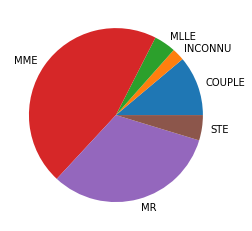

In [28]:
import matplotlib.pyplot as plt
plt.pie(x=repartition["NbTicket"], labels=repartition.index)

13.	What is the biggest Total for  MME? 

The average Total for STE? 

We make a grouping then we calculate max/average/... Then we select the civilite object of the study.

In [29]:
repartition=df.groupby('Civilite').agg({'Total': ['max']})
repartition.loc[repartition.index=='MME']

,Total
,max
Civilite,
MME,3675.0


In [30]:
repartition=df.groupby('Civilite').agg({'Total': ['mean']})
repartition.loc[repartition.index=='STE']

,Total
,mean
Civilite,
STE,173.874912


14.	Produce Box plots of the Civilite Totals. 

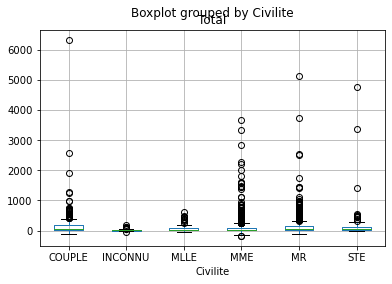

In [31]:
df.boxplot("Total", by="Civilite")

it's not easy to analyse box plots with a lot of outliers 

15.	For better comparison, remove the outliers above 500.

Reproduce the moustache boxes and read. 

Except for the UNKNOWN civility, the smallest box is the MME one: homogeneous population of ladies.

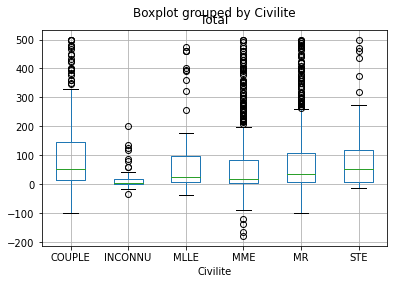

In [32]:
df.loc[df['Total']<500].boxplot("Total", by="Civilite")

16.	Add a Recency variable "Recence", whose value is equal to the difference between the purchase date and the system date. 
The column DateAchat (purchase Date) is read as a string, it must first be converted to a date and then subtracted from the system date in terms of days.

we'll need datetime library

In [33]:
from datetime import datetime
df['DateAchat'] = pd.to_datetime(df['DateAchat'])
df['Recence']=(datetime.now() - df['DateAchat']).dt.days

In [34]:
df.head

<bound method NDFrame.head of       NumTicket NomPrenom Magasin  DateAchat Rayon ArticleEnPub Civilite  \
0      17949252      AUCL     752 2014-05-08     7          NaN      MME   
1      12817341      AMAB     895 2013-03-24     6          NaN       MR   
2      13575108      AMIS     905 2013-06-08     P          NaN      MME   
3      19135477      AMIC     941 2014-08-30     7          NaN      MME   
4       9170032      ARZO     865 2012-12-02     6          NaN       MR   
...         ...       ...     ...        ...   ...          ...      ...   
2442   23177060      ZENI     791 2016-03-17     6           PB       MR   
2443   16795053      ZULA     U10 2014-01-18     6          NaN       MR   
2444   24026738      ZORN     554 2016-08-27     7           PB      MME   
2445    3187683      ZILL     152 2011-08-26     6          NaN     MLLE   
2446   20022450      ZIMM     175 2014-11-22     C          NaN  INCONNU   

      CodePostal  Quantite  PrixSurEtiquette  PrixUnitair

17.	Illustrate the frequency distribution of 'Recence' with an histogram. 

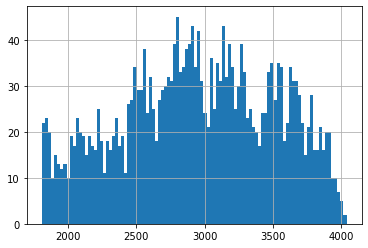

In [35]:
df['Recence'].hist(bins=100)
plt.show()

18.	Display the quartiles, the mean and the median for the "Recence" variable. 
What do we notice? The mean and the median are almost identical. We plot the boxplot, it is clear that 'Recence' follows a normal distribution

In [36]:
df.Recence.quantile([0,0.25,0.5,0.75,1])

0.00    1810.0
0.25    2537.0
0.50    2951.0
0.75    3405.0
1.00    4037.0
Name: Recence, dtype: float64

In [37]:
df.Recence.mean()

2946.3134450347366

In [38]:
df.Recence.median()

2951.0

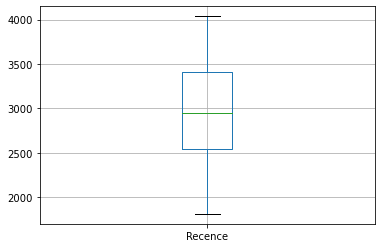

In [39]:
df.boxplot("Recence")

19.	Recode 'Recence' variable as follows:
    • very Recent if recency < 1500
    • Recent if recency is between 1500 and 2500 
    • old if recency > 2500 
We cut the population in three subgroups and then we make a matching with the numpy library. We can visualize the distribution of each modality. Recent customers have a very low percentage.

In [40]:
import numpy as np
criteria = [df['Recence']<1500, df['Recence'].between(1500,2500), df['Recence']>2500]
values = ['Recent','Moyen','Ancien']
df['Rec'] = np.select(criteria, values, 0)

In [41]:
df.groupby('Rec').agg({'NumTicket': ['count']})

,NumTicket
,count
Rec,
Ancien,1880
Moyen,567
